In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
dat = pd.read_csv("census2000.csv")

In [3]:
dat

,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669
...,...,...,...,...
71,2,2000,80,3221898
72,2,1900,85,48614
73,2,2000,85,1981156
74,2,1900,90,20093


In [4]:
dff1900

NameError: name 'dff1900' is not defined

In [5]:
dfm1900 = dat.loc[np.array(dat['Year']==1900)*np.array(dat['Sex']==1)][['Age', 'People']]
dfm1900 = dfm1900.rename(columns={"People":"Male1900"})
dfm1900.index = np.array(dfm1900['Age'])
dff1900 = dat.loc[np.array(dat['Year']==1900)*np.array(dat['Sex']==2)][['Age', 'People']]
dff1900 = dff1900.rename(columns={"People":"Female1900"})
dff1900.index = np.array(dff1900['Age'])
dfm2000 = dat.loc[np.array(dat['Year']==2000)*np.array(dat['Sex']==1)][['Age', 'People']]
dfm2000 = dfm2000.rename(columns={"People":"Male2000"})
dfm2000.index = np.array(dfm2000['Age'])
dff2000 = dat.loc[np.array(dat['Year']==2000)*np.array(dat['Sex']==2)][['Age', 'People']]
dff2000 = dff2000.rename(columns={"People":"Female2000"})
dff2000.index = np.array(dff2000['Age'])


df = pd.DataFrame()
df['Age'] = dfm1900['Age']
df['Male1900'] = dfm1900['Male1900']
df['Female1900'] = dff1900['Female1900']
df['Male2000'] = dfm2000['Male2000']
df['Female2000'] = dff2000['Female2000']

In [6]:
df

,Age,Male1900,Female1900,Male2000,Female2000
0,0,4619544,4589196,9735380,9310714
5,5,4465783,4390483,10552146,10069564
10,10,4057669,4001749,10563233,10022524
15,15,3774846,3801743,10237419,9692669
20,20,3694038,3751061,9731315,9324244
25,25,3389280,3236056,9659493,9518507
30,30,2918964,2665174,10205879,10119296
35,35,2633883,2347737,11475182,11635647
40,40,2261070,2004987,11320252,11488578
45,45,1868413,1648025,9925006,10261253


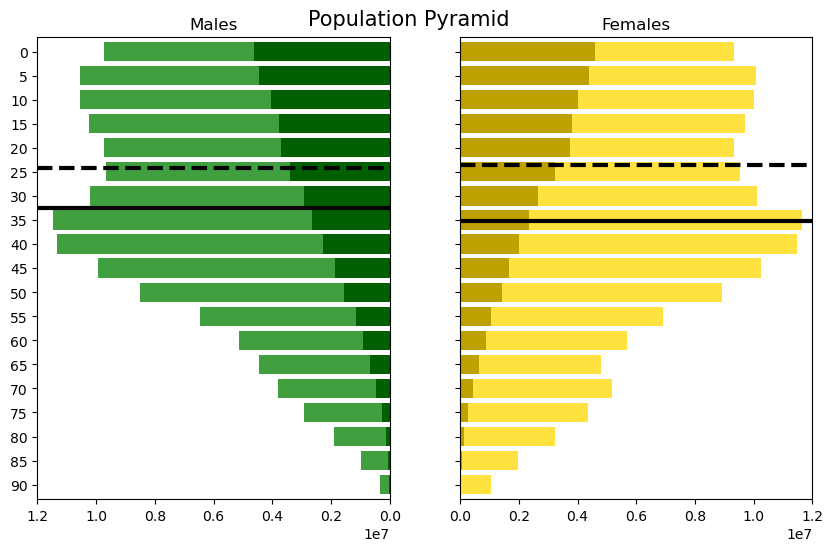

In [7]:
#define x and y limits
y = df['Age']
x_male = df['Male1900']
x2_male = df['Male2000']
x_female = df['Female1900']
x2_female = df['Female2000']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='black', height=4)
axes[0].axhline(np.average(df['Age'], weights=df['Male1900']), linestyle = '--',color='black', linewidth=3)
axes[0].barh(y, x2_male, align='center', color='green', alpha = 0.75, height=4)
axes[0].axhline(np.average(df['Age'], weights=df['Male2000']), color='black', linewidth=3)
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='black', height=4)
axes[1].axhline(np.average(df['Age'], weights=df['Female1900']), linestyle = '--',color='black', linewidth=3)
axes[1].barh(y, x2_female, align='center', color='gold', alpha = 0.75, height=4)
axes[1].axhline(np.average(df['Age'], weights=df['Female2000']), color='black', linewidth=3)

axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
#axes[1].grid()
axes[0].set(yticks=y, yticklabels=df['Age'])
axes[0].set_xlim([0, 1.2e7])
axes[1].set_xlim([0, 1.2e7])
axes[0].invert_xaxis()
axes[0].set_ylim([-3,93])
axes[0].invert_yaxis()
#axes[0].grid()

#display plot
plt.show()

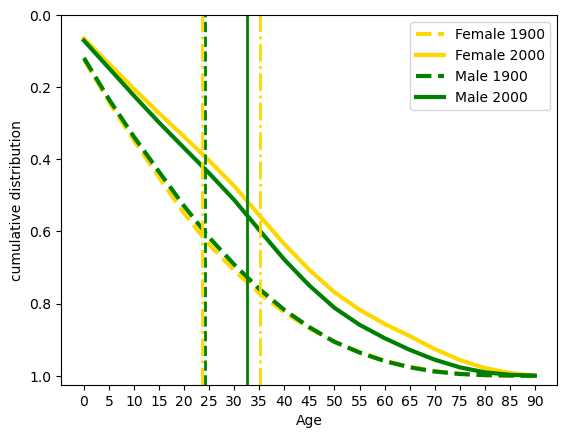

In [8]:
plt.plot(df['Age'], np.cumsum(df['Female1900'])/sum(df['Female1900']), color='gold', linestyle='--', linewidth=3, label='Female 1900')
plt.plot(df['Age'], np.cumsum(df['Female2000'])/sum(df['Female2000']), color='gold', linestyle='-', linewidth=3, label='Female 2000')

plt.plot(df['Age'], np.cumsum(df['Male1900'])/sum(df['Male1900']), color='green', linestyle='--', linewidth=3, label='Male 1900')
plt.plot(df['Age'], np.cumsum(df['Male2000'])/sum(df['Male2000']), color='green', linestyle='-', linewidth=3, label='Male 2000')

plt.xlabel('Age')
plt.ylabel("cumulative distribution")
plt.ylim([0,1.025])
plt.xticks(df['Age'])
plt.legend(loc='upper right')

plt.axvline(np.average(df['Age'], weights=df['Female1900']),  color='gold', linestyle='dashdot', linewidth=2)
plt.axvline(np.average(df['Age'], weights=df['Female2000']),  color='gold', linestyle='dashdot', linewidth=2)
plt.axvline(np.average(df['Age'], weights=df['Male1900']),  color='green', linestyle='--', linewidth=2)
plt.axvline(np.average(df['Age'], weights=df['Male2000']),  color='green', linestyle='-', linewidth=2)
#plt.yscale('log')

plt.gca().invert_yaxis()

pass

In [9]:
(df['Female2000']+df['Male2000'])/2

0      9523047.0
5     10310855.0
10    10292878.5
15     9965044.0
20     9527779.5
25     9589000.0
30    10162587.5
35    11555414.5
40    11404415.0
45    10093129.5
50     8709533.5
55     6690175.0
60     5396180.0
65     4629203.5
70     4488500.0
75     3634149.5
80     2562268.0
85     1475756.5
90      700442.0
dtype: float64

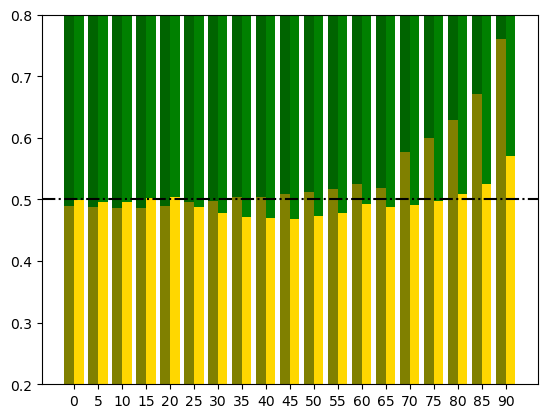

In [10]:
plt.bar(df['Age']-1, (df['Female2000']+df['Male2000'])/(df['Female2000']+df['Male2000']), color='darkgreen', width=2)
plt.bar(df['Age']-1, df['Female2000']/(df['Female2000']+df['Male2000']), color='olive', width=2)

#plt.plot(df['Age']-1, (df['Female2000']+df['Male2000'])/2, linestyle='dashdot', color='black')


plt.bar(df['Age']+1, (df['Female1900']+df['Male1900'])/(df['Female1900']+df['Male1900']), color='green', width=2)
plt.bar(df['Age']+1, df['Female1900']/(df['Female1900']+df['Male1900']), color='gold', width=2)

#plt.plot(df['Age']-1, (df['Female1900']+df['Male1900'])/2, linestyle='dashdot', color='brown')

plt.axhline(0.5,  linestyle='dashdot', color='black')

plt.xticks(df['Age'])

#plt.yscale('log')
plt.ylim([0.2,0.8])
pass

In [11]:
temp = []; tempcut = 75
temp.extend(df.loc[df['Age']<=tempcut,'Female2000']/(df.loc[df['Age']<=tempcut,'Female2000']+df.loc[df['Age']<=tempcut,'Male2000']))
temp.extend(df.loc[df['Age']<=tempcut,'Female1900']/(df.loc[df['Age']<=tempcut,'Female1900']+df.loc[df['Age']<=tempcut,'Male1900']))

tempmean = 100*np.mean(temp)
tempstd = 100*np.std(temp)

ctemp = df['Female1900']+df['Male1900']
ctemp = np.sum(ctemp.iloc[0])
#mtemp = np.sum(df['Female1900'].iloc[3:7])

In [16]:
tempstd

2.6829244581170637

In [14]:
sns.set_context('notebook')

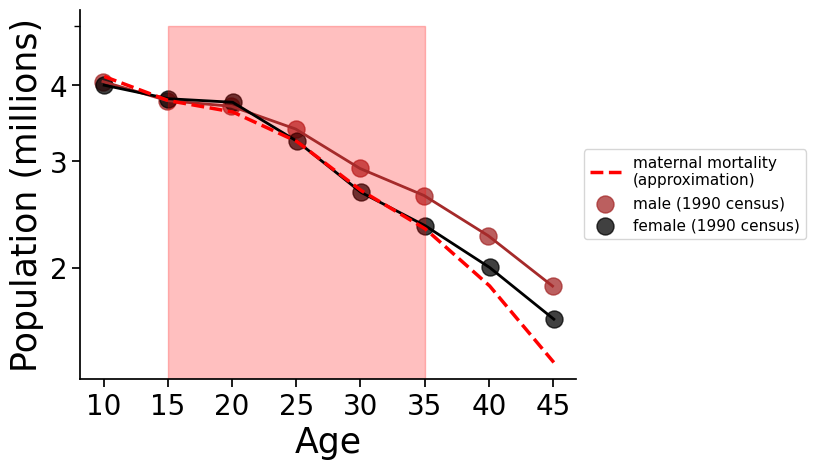

In [15]:
ran = [2,3,4,5,6,7,8,9]
x = (df['Male1900'].iloc[ran].index-15)

plt.plot(x-0.05,df['Male1900'].iloc[ran] , color='brown', linewidth=2)
plt.plot(x+0.05,df['Female1900'].iloc[ran] , color='black', linewidth=2)

plt.plot(x+0.05,df['Male1900'].iloc[ran] - x/5*(850/100000)*ctemp, color='red', linewidth=2.5, linestyle='--',label='maternal mortality\n(approximation)')

#plt.bar(x-0.5,df['Male1900'].iloc[ran],width=2,color='darkgrey', label='male', alpha=0.75)
plt.scatter(x-0.05,df['Male1900'].iloc[ran],s=150,marker='o',color='brown',alpha=0.75, label='male (1990 census)')
#plt.bar(x+0.5,df['Female1900'].iloc[ran], width=2,color='darkgreen', label='female', alpha=0.75)
plt.scatter(x+0.05,df['Female1900'].iloc[ran],s=150,marker='o',color='black',alpha=0.75, label='female (1990 census)')

#plt.axvline(x[1], color='red', linestyle='dotted')
#plt.axvline(x[5], color='red', linestyle='dotted')
plt.gca().fill_between([x[1], x[5]], (0), (5e6), color='red', alpha=.25)


plt.xticks(x,df['Age'].iloc[ran], fontsize=20)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Age", fontsize=25)
plt.ylabel("Population (millions)", fontsize=25)

for spine in plt.gca().spines:
    if spine == "top" or spine == "right":
        plt.gca().spines[spine].set_visible(False)

plt.yscale('log')
plt.yticks([ 2e6, 3e6, 4e6], [2,3,4],fontsize=20)

pass

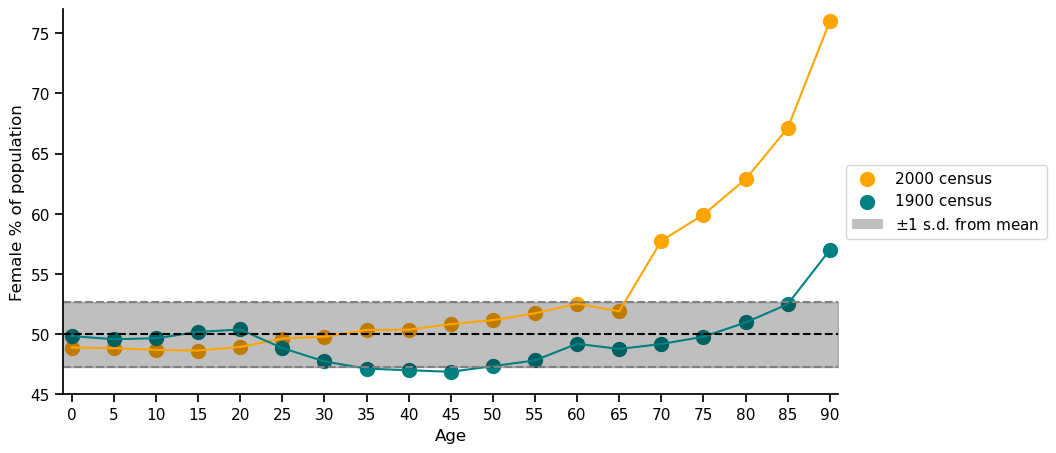

In [711]:
fig = plt.figure(figsize=(10,5))

plt.scatter(df['Age'], 100*df['Female2000']/(df['Female2000']+df['Male2000']), s = 100, color='orange', label='2000 census')
plt.plot(df['Age'], 100*df['Female2000']/(df['Female2000']+df['Male2000']), color='orange')


plt.scatter(df['Age'], 100*df['Female1900']/(df['Female1900']+df['Male1900']), s = 100,  color='teal', label='1900 census')
plt.plot(df['Age'], 100*df['Female1900']/(df['Female1900']+df['Male1900']), color='teal')


plt.ylabel('Female % of population')
plt.xlabel("Age")

plt.axhline([tempmean], color='black', linestyle='--')
plt.axhline([tempmean - 1*tempstd], color='grey', linestyle='--')
plt.axhline([tempmean + 1*tempstd], color='grey', linestyle='--')
plt.bar([-10],[1], color='black', alpha=0.25, label=r"$\pm1$ s.d. from mean ")
plt.gca().fill_between(np.arange(-2,92), (tempmean-tempstd), (tempmean+tempstd), color='k', alpha=.25)
plt.xlim([-1,91])

plt.ylim([100*0.45,100*0.77])

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.xticks(df['Age'])

for spine in plt.gca().spines:
    if spine == "top" or spine == "right":
        plt.gca().spines[spine].set_visible(False)

#plt.gca().set_aspect('equal')

#plt.yscale('log')
#plt.yticks([0.45, 0.5, 0.55, 0.6 , 0.65, 0.7, 0.75], [0.45, 0.5, 0.55, 0.6 , 0.65, 0.7, 0.75])

pass

In [620]:
tdf = pd.DataFrame()
tdf['Age'] = df['Age']
tdf['ff19'] = df['Female1900']/(df['Female1900']+df['Male1900'])
tdf['ff20'] = df['Female2000']/(df['Female2000']+df['Male2000'])
tdf['m19'] = df['Male1900']
tdf['f19'] = df['Female1900']

In [624]:
tdf.to_csv("to_tableu.csv")

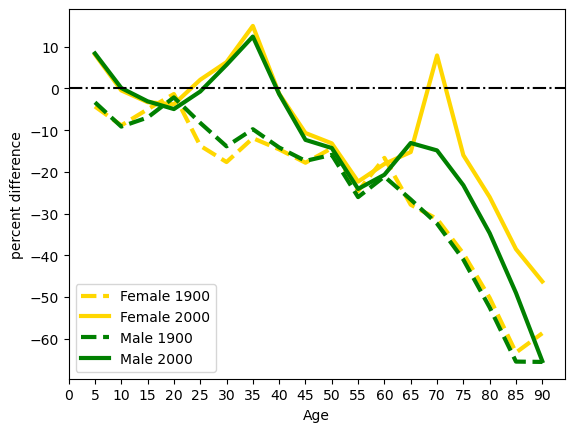

In [454]:
plt.plot(df['Age'].iloc[1:], 100*np.diff(df['Female1900'])/(df['Female1900'].iloc[0:-1]), color='gold', linestyle='--', linewidth=3, label='Female 1900')
plt.plot(df['Age'].iloc[1:], 100*np.diff(df['Female2000'])/(df['Female2000'].iloc[0:-1]), color='gold', linestyle='-', linewidth=3, label='Female 2000')
pdf = 100*np.diff(df['Female1900'])/(df['Female1900'].iloc[0:-1])

plt.plot(df['Age'].iloc[1:], 100*np.diff(df['Male1900'])/(df['Male1900'].iloc[0:-1]), color='green', linestyle='--', linewidth=3, label='Male 1900')
pdm = 100*np.diff(df['Male1900'])/(df['Male1900'].iloc[0:-1])
plt.plot(df['Age'].iloc[1:], 100*np.diff(df['Male2000'])/(df['Male2000'].iloc[0:-1]), color='green', linestyle='-', linewidth=3, label='Male 2000')

plt.xlabel('Age')
plt.ylabel("percent difference")
plt.xticks(df['Age'])
plt.legend(loc='lower left')

plt.axhline(0, linestyle='dashdot', color='black')

#plt.ylim([-50,10])

pass

In [455]:
pdf.iloc[4:7]

20   -13.729582
25   -17.641289
30   -11.910554
Name: Female1900, dtype: float64

In [456]:
pdm.iloc[4:7]

20    -8.249996
25   -13.876576
30    -9.766513
Name: Male1900, dtype: float64

In [457]:
pdf.iloc[4:7]/pdm.iloc[4:7]

20    1.664193
25    1.271300
30    1.219530
dtype: float64

In [469]:
ctemp/mtemp*(820/100000)

0.01592238259543569